In [1]:
import pandas as pd
import numpy as np
import json

import matplotlib.pyplot as plt
import seaborn as sns

%store -r tags_dict

In [2]:
games_df = pd.read_json('../data/processed/1 - Games DF - Wrangled.json')

In [16]:
games_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9962 entries, 0 to 9961
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   app_id                    9962 non-null   int64  
 1   release_date              9956 non-null   float64
 2   price                     9345 non-null   float64
 3   price_category            9345 non-null   object 
 4   tags                      9962 non-null   object 
 5   mod_interface_languages   9962 non-null   object 
 6   mod_full_audio_languages  9962 non-null   object 
 7   mod_subtitles_languages   9962 non-null   object 
 8   language_comment_counts   9962 non-null   object 
 9   comment_ratios            9962 non-null   object 
 10  comment_diff_agnostic     9962 non-null   object 
 11  comment_diff_any          9962 non-null   object 
 12  comment_diff_interface    9962 non-null   object 
 13  comment_diff_audio        9962 non-null   object 
 14  comment_

In [7]:
exploded_tags = games_df.explode('tags')
tag_counts = exploded_tags['tags'].value_counts()
sorted_tag_counts = tag_counts.sort_values(ascending=False)

In [14]:
tag_ids = sorted_tag_counts.index
tag_counts = sorted_tag_counts.values
to_df = {"id":tag_ids, "count":tag_counts}
tag_count_df = pd.DataFrame(to_df)

for index, row in tag_count_df.iterrows() :
    tag_count_df.loc[index, 'name'] = tags_dict[str(row['id'])] 

tag_count_df.head(50)

,id,count,name
0,19,2881,Action
1,21,2612,Adventure
2,492,2334,Indie
3,4182,1915,Singleplayer
4,599,1830,Simulation
5,9,1794,Strategy
6,122,1730,RPG
7,597,1692,Casual
8,3859,1422,Multiplayer
9,1664,1036,Puzzle


In [32]:
cutoffs = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]

for cutoff in cutoffs :
    print("Over "+str(cutoff)+": "+str(len(tag_count_df[tag_count_df['count'] > cutoff])))


Over 100: 153
Over 200: 84
Over 300: 60
Over 400: 38
Over 500: 27
Over 600: 23
Over 700: 18
Over 800: 14
Over 900: 13
Over 1000: 10


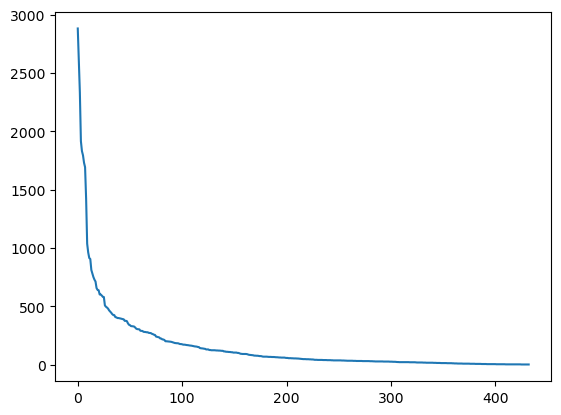

In [23]:
plt.plot(tag_count_df.index, tag_count_df['count'])